In [1]:
import pandas as pd

anime_data = pd.read_csv("anime.csv")
rating_data = pd.read_csv("rating.csv")

anime_data.head()

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266


In [2]:
print(anime_data.shape)
print(rating_data.shape)

(12294, 7)
(7813737, 3)


In [4]:
anime_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12294 entries, 0 to 12293
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   anime_id  12294 non-null  int64  
 1   name      12294 non-null  object 
 2   genre     12232 non-null  object 
 3   type      12269 non-null  object 
 4   episodes  12294 non-null  object 
 5   rating    12064 non-null  float64
 6   members   12294 non-null  int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 672.5+ KB


In [6]:
anime_data.describe(include='object')


,name,genre,type,episodes
count,12294,12232,12269,12294
unique,12292,3264,6,187
top,Shi Wan Ge Leng Xiaohua,Hentai,TV,1
freq,2,823,3787,5677


In [ ]:
anime_data['genre'] = anime_data['genre'].str.split(',')
anime_data

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"[Drama, Romance, School, Supernatural]",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"[Action, Adventure, Drama, Fantasy, Magic,...",TV,64,9.26,793665
2,28977,Gintama°,"[Action, Comedy, Historical, Parody, Samur...",TV,51,9.25,114262
3,9253,Steins;Gate,"[Sci-Fi, Thriller]",TV,24,9.17,673572
4,9969,Gintama&#039;,"[Action, Comedy, Historical, Parody, Samur...",TV,51,9.16,151266
...,...,...,...,...,...,...,...
12289,9316,Toushindai My Lover: Minami tai Mecha-Minami,[Hentai],OVA,1,4.15,211
12290,5543,Under World,[Hentai],OVA,1,4.28,183
12291,5621,Violence Gekiga David no Hoshi,[Hentai],OVA,4,4.88,219
12292,6133,Violence Gekiga Shin David no Hoshi: Inma Dens...,[Hentai],OVA,1,4.98,175


In [ ]:
exploded_column = anime_data['genre'].explode()

# Get all unique elements from the exploded column
unique_elements = exploded_column.unique()
unique_elements

array(['Drama', 'Romance', 'School', 'Supernatural', 'Action',
       'Adventure', 'Fantasy', 'Magic', 'Military', 'Shounen', 'Comedy',
       'Historical', 'Parody', 'Samurai', 'Sci-Fi', 'Thriller', 'Sports',
       'Super Power', 'Space', 'Slice of Life', 'Mecha', 'Music',
       'Mystery', 'Seinen', 'Martial Arts', 'Vampire', 'Shoujo', 'Horror',
       'Police', 'Psychological', 'Demons', 'Ecchi', 'Josei',
       'Shounen Ai', 'Game', 'Dementia', 'Harem', 'Cars', 'Kids',
       'Shoujo Ai', nan, 'Hentai', 'Yaoi', 'Yuri'], dtype=object)

In [ ]:
anime_data['genre'] = anime_data['genre'].apply(lambda x: [item.strip() for item in x] if isinstance(x, list) else [])


In [ ]:
anime_data_remove = anime_data[anime_data['genre'].apply(lambda x: any(genre in x for genre in ['Hentai', 'Ecchi', 'Yaoi', 'Yuri']))]
anime_data_remove

,anime_id,name,genre,type,episodes,rating,members
61,28171,Shokugeki no Souma,"[Ecchi, School, Shounen]",TV,24,8.61,348951
105,32282,Shokugeki no Souma: Ni no Sara,"[Ecchi, School, Shounen]",TV,13,8.50,185015
118,19815,No Game No Life,"[Adventure, Comedy, Ecchi, Fantasy, Game, Supe...",TV,12,8.47,602291
141,23755,Nanatsu no Taizai,"[Action, Adventure, Ecchi, Fantasy, Shounen, S...",TV,24,8.42,331627
425,5781,Isekai no Seikishi Monogatari,"[Action, Comedy, Ecchi, Fantasy, Harem, Mecha,...",OVA,13,8.09,72021
...,...,...,...,...,...,...,...
12289,9316,Toushindai My Lover: Minami tai Mecha-Minami,[Hentai],OVA,1,4.15,211
12290,5543,Under World,[Hentai],OVA,1,4.28,183
12291,5621,Violence Gekiga David no Hoshi,[Hentai],OVA,4,4.88,219
12292,6133,Violence Gekiga Shin David no Hoshi: Inma Dens...,[Hentai],OVA,1,4.98,175


In [23]:
anime_data_remove.shape
remove_list = anime_data_remove["anime_id"].unique()
remove_list.shape

(1808,)

In [25]:
clean_rating = rating_data[~rating_data["anime_id"].isin(remove_list)]
print(clean_rating.shape)
rating_data.shape

(6738381, 3)


(7813737, 3)

In [26]:
clean_anime = anime_data[~anime_data['genre'].apply(lambda x: any(genre in x for genre in ['Hentai', 'Ecchi', 'Yaoi', 'Yuri']))]
exploded_column = clean_anime['genre'].explode()

# Get all unique elements from the exploded column
unique_elements = exploded_column.unique()
unique_elements

array(['Drama', 'Romance', 'School', 'Supernatural', 'Action',
       'Adventure', 'Fantasy', 'Magic', 'Military', 'Shounen', 'Comedy',
       'Historical', 'Parody', 'Samurai', 'Sci-Fi', 'Thriller', 'Sports',
       'Super Power', 'Space', 'Slice of Life', 'Mecha', 'Music',
       'Mystery', 'Seinen', 'Martial Arts', 'Vampire', 'Shoujo', 'Horror',
       'Police', 'Psychological', 'Demons', 'Josei', 'Shounen Ai', 'Game',
       'Dementia', 'Harem', 'Cars', 'Kids', 'Shoujo Ai', nan],
      dtype=object)

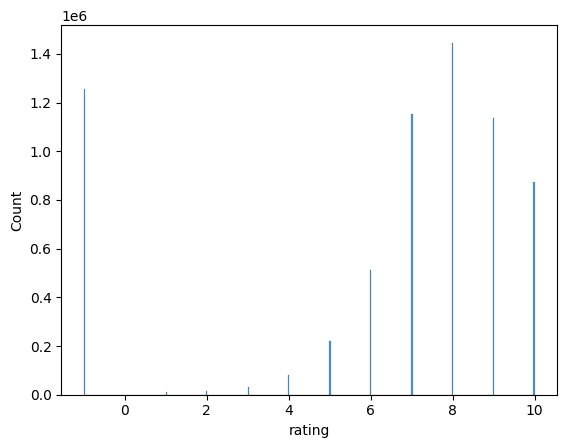

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.histplot(data=clean_rating["rating"])
plt.show()

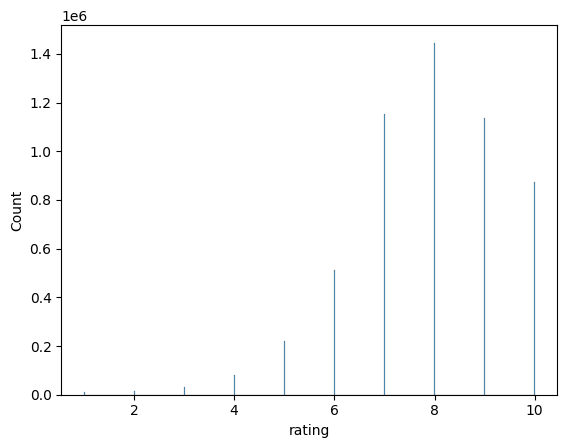

In [61]:
clean_rating2 = clean_rating[clean_rating["rating"] >= 0]
sns.histplot(data=clean_rating2["rating"])
plt.show()

In [63]:
my_prefs = pd.DataFrame({
    'user_id': [75000,75000,75000,75000,75000,75000,75000,75000,75000,75000,75000],
    'anime_id': [30276,31772,16498,853,31964,1535,22319,2167,11061,32182,4224],
    'rating': [10,9,8,6,7,9,7,5,10,10,8]
})

clean_rating2 = pd.concat([clean_rating2, my_prefs], ignore_index=True)
# clean_anime[clean_anime["name"].str.contains("Kaisen")]

In [64]:
rating_table = clean_rating2.pivot_table(index='anime_id', columns='user_id', values='rating', aggfunc='mean')
rating_table

user_id,1,2,3,5,7,8,9,10,11,12,...,73508,73509,73510,73511,73512,73513,73514,73515,73516,75000
anime_id,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,9.0,NaN,10.0,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,8.0,NaN,10.0,NaN,NaN
6,NaN,NaN,NaN,8.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.0,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34324,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
34325,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
34349,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
non_nan_counts = rating_table.notna().sum()
print(non_nan_counts[75000])
print("columns:", len(rating_table.columns))
print("rows:", len(rating_table.index))

11
columns: 69181
rows: 8212


In [ ]:
remove_table = non_nan_counts[non_nan_counts < 10]

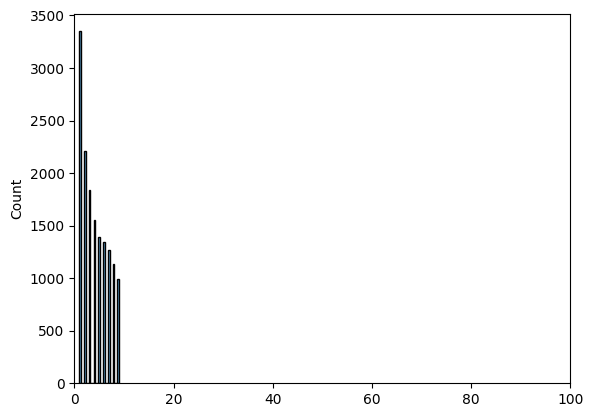

In [71]:
sns.histplot(remove_table)
plt.xlim(0, 100)
plt.show()

In [72]:
remove_table

user_id
1        1
2        1
9        1
10       3
15       1
        ..
73505    2
73508    6
73509    1
73514    1
73516    1
Length: 15076, dtype: int64

In [73]:
rating_table2 = rating_table.drop(columns=remove_table.index)
len(rating_table2.columns)

54105

In [86]:
rating_table2

user_id,3,5,7,8,11,12,14,17,18,19,...,73503,73504,73506,73507,73510,73511,73512,73513,73515,75000
anime_id,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.0,...,9.0,10.0,NaN,9.0,NaN,NaN,NaN,9.0,10.0,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.0,...,7.0,10.0,NaN,8.0,NaN,NaN,NaN,8.0,10.0,NaN
6,NaN,8.0,NaN,NaN,NaN,NaN,NaN,7.0,NaN,NaN,...,9.0,9.0,NaN,9.0,NaN,NaN,NaN,NaN,10.0,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34324,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
34325,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
34349,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [137]:
import numpy as np

def cosine_similarity(x, y):
    # Perform element-wise multiplication, skipping NaN values
    products = x.mul(y)
    
    # Filter out NaN values from the products
    non_nan_products = products[~products.isna()]

    # need at least 5 similar shows
    if len(non_nan_products) < 5: return 0
    
    # Sum of products
    sum_of_products = non_nan_products.sum()
    
    # Calculate magnitude of vectors using only non-NaN elements
    non_nan_x = x[~x.isna() & ~y.isna()]
    non_nan_y = y[~x.isna() & ~y.isna()]
    
    magnitude_x = np.sqrt((non_nan_x ** 2).sum())
    magnitude_y = np.sqrt((non_nan_y ** 2).sum())
    
    # Check for division by zero
    if magnitude_x == 0 or magnitude_y == 0:
        return 0  # or any other default value you prefer
    
    # Calculate cosine similarity
    cosine_sim = sum_of_products / (magnitude_x * magnitude_y)
    
    return cosine_sim


In [142]:
i = 75000

# calculate the cosine similarity between selected user(i) and every other user
cs_users = pd.Series()
for col in rating_table2.columns: 
    if col != i:
        cs_users.loc[col] = cosine_similarity(rating_table2[i], rating_table2[col])

# for every unseen anime, calculate a score based on the user rating times its cosine similarity
anime_rec = pd.Series()
seen = rating_table2[i][~rating_table2[i].isna()].index.tolist()
for anime in rating_table2.index.tolist():
    if anime not in seen:
        anime_rec.loc[anime] = rating_table2.loc[anime].mul(cs_users).sum()/(cs_users.sum() + 1e-7)

sorted = anime_rec.dropna().sort_values(ascending=False)
top5 = sorted.head(5).index.tolist()
print("this is what i should watch!")
for index, anime in enumerate(top5):
    print(f"{index+1} rec: {clean_anime[clean_anime["anime_id"] == anime]["name"]}")

this is what i should watch!
1 rec: 804    Sword Art Online
Name: name, dtype: object
2 rec: 1    Fullmetal Alchemist: Brotherhood
Name: name, dtype: object
3 rec: 159    Angel Beats!
Name: name, dtype: object
4 rec: 19    Code Geass: Hangyaku no Lelouch
Name: name, dtype: object
5 rec: 3    Steins;Gate
Name: name, dtype: object
